### Linear regression with a toy 
We first examine a toy problem, focusing our efforts on fitting a linear model to a small dataset with three observations.  Each observation consists of one predictor $x_i$ and one response $y_i$ for $i = 1, 2, 3$,

\begin{equation*}
(x , y) = \{(x_1, y_1), (x_2, y_2), (x_3, y_3)\}.
\end{equation*}

To be very concrete, let's set the values of the predictors and responses.

\begin{equation*}
(x , y) = \{(1, 2), (2, 2), (3, 4)\}
\end{equation*}

There is no line of the form $\beta_0 + \beta_1 x = y$ that passes through all three observations, since the data is not collinear.  Thus our aim is to find the line that best fits these observations in the *least-squares sense*, as discussed in lecture.


### Matrices and math

Suspending reality, suppose there is a line $\beta_0 + \beta_1 x = y$ that passes through all three observations.  Then we'd solve

\begin{eqnarray}
\beta_0 + \beta_1 &=& 2 \nonumber \\
\beta_0 + 2 \beta_1 &=& 2 \nonumber \\
\beta_0 + 3 \beta_1 &=& 4, \nonumber \\
\end{eqnarray}


for  $\beta_0$ and  $\beta_1$, the intercept and slope of the desired line.  Let's write these equations in matrix form.  The left hand sides of the above equations can be written as

<img src="https://raw.githubusercontent.com/mashwinmuthiah/Harvard_CS109/master/Lab/Lab3/LHS.JPG" alt="Drawing" style="width: 450px;"/>

while the right hand side is simply the vector

\begin{equation*}Y = \begin{bmatrix}
2 \\
2 \\
4 
\end{bmatrix}. \end{equation*}

Thus we have the matrix equation $X \beta = Y$ where

\begin{equation}
X = \begin{bmatrix}
1 & 1\\
1 & 2\\
1 & 3
\end{bmatrix}, \quad
\beta = \begin{pmatrix}
\beta_0 \\
\beta_1 
\end{pmatrix}, \quad \mathrm{and} 
\quad Y = \begin{bmatrix}
2 \\
2 \\
4 
\end{bmatrix}.
\end{equation}

To find the best possible solution to this linear system that has no solution, we need to solve the *normal equations*, or

\begin{equation}
X^T X \beta = X^T Y.
\end{equation}

If $X^T X$ is invertible then the solution is

\begin{equation}
\beta = (X^T X)^{-1} X^T Y.
\end{equation}




### If we add one more Variable/Predictor

The $X$ matrix and vector $\beta$ change.  In this case adding a second predictor variable would result in adding a third column to the $X$ matrix, so that the matrix is $3 \times 3$.  A third variable would be added to the $\beta$ vector.  Note that we need to be consistent in appending rows and columns to the matrix $X$ and the vector $\beta$.  For example, if the new predictor column is 

\begin{equation}
\begin{bmatrix}
v_1 \\
v_2 \\
v_3
\end{bmatrix}, 
\end{equation}

and we include it in the $X$ matrix as

\begin{equation}
X = \begin{bmatrix}
1 & 1 & v_1\\
1 & 2 & v_2\\
1 & 3 & v_3
\end{bmatrix},
\end{equation}
then the corresponding $\beta$ vector is

\begin{equation}
\beta = \begin{pmatrix}
\beta_0 \\
\beta_1 \\
\beta_2
\end{pmatrix}.
\end{equation}


Thus the linear system in matrix form is still $X \beta = Y$, 

\begin{equation}
\begin{bmatrix}
1 & 1 & v_1\\
1 & 2 & v_2\\
1 & 3 & v_3
\end{bmatrix} \begin{pmatrix}
\beta_0 \\
\beta_1 \\
\beta_2
\end{pmatrix} = \begin{bmatrix}
2 \\
2 \\
4 
\end{bmatrix}, 
\end{equation}

which can be expanded as (via matrix multiplication as discussed during lab)


\begin{eqnarray}
\beta_0 + \beta_1 + v_1 \beta_2&=& 2 \nonumber \\
\beta_0 + 2 \beta_1 + v_2 \beta_2 &=& 2 \nonumber \\
\beta_0 + 3 \beta_1 + v_3 \beta_2&=& 4. \nonumber \\
\end{eqnarray}

Everything else remains the same.  

The question came up about whether the addition of a third column changes the invertibility of $X^T X$.  The answer is that it depends on the particular values of $v_1, v_2$, and $v_3$.  For example, if $v_1 = v_2 = v_3 = 1$, then  $X^T X$ is not invertible.  If $v_1 = v_2 = 1$ and $v_3 = 4$, then $X^T X$ is invertible.  You check this directly via the code below.  In the code we've used the determinant of $X^T X$ to check for invertibility.  That is, $X^T X$ is invertible if and only if $\det(X^T X) \ne 0$.  

*(You can be fancier about this if you like by using the properties of determinants, in the case when $X$ is a square matrix. $\det X^T X = \det X^T \det X = \det X \det X = (\det X)^2$, and since $\det X = 0$ in the first example, $\det X^T X = 0$ and hence is not invertible.  For the first example with $v_1 = v_2 = v_3 = 1$ we can see by inspection that $X$ is not invertible since the third column of $X$ is a constant multiple of the first column, ie, the  columns of $X$ do not form a linearly independent set.)*

In [24]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [25]:
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')

In [26]:
X_train = np.array([1,2,3])
y_train = np.array([2,2,4])

In [27]:
def simple_linear_regression(X_train,y_train):
    X_train = X_train.reshape(len(X_train),1)
    y_train = y_train.reshape(len(y_train),1)
    n = X_train.shape[0]
    ones_col = np.ones((n,1))
    X = np.concatenate((ones_col,X_train),axis = 1)
    
    LHS = np.dot(np.transpose(X),X)
    RHS = np.dot(np.transpose(X),y_train)
    
    betas = np.dot(np.linalg.inv(LHS),RHS)
    
    return betas

betas = simple_linear_regression(X_train,y_train)
print('The Values for Beta1 :{} and Beta2 : {}'.format(betas[0],betas[1]))

The Values for Beta1 :[0.66666667] and Beta2 : [1.]


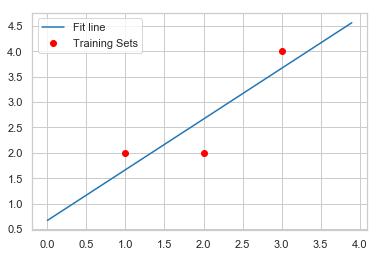

In [28]:
f = lambda x:betas[0] + betas[1]*x
x_fit = np.arange(0,4,0.1)
y_fit = f(x_fit)
plt.scatter(X_train,y_train,color = 'red',label = 'Training Sets')
plt.plot(x_fit,y_fit,label = 'Fit line')
plt.legend(loc = "best")

### Linear Regression using Statsmodels

In [29]:
X = sm.add_constant(X_train)
toyreg_sm = sm.OLS(y_train,X)
result_sm = toyreg_sm.fit()
beta0_sm = result_sm.params[0]
beta1_sm = result_sm.params[1]

print('The Values for Beta1 :{} and Beta2 : {}'.format(beta0_sm,beta1_sm))
result_sm.summary()

The Values for Beta1 :0.6666666666666661 and Beta2 : 1.0000000000000009


C:\Users\ashwi\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     3.000
Date:                Mon, 12 Aug 2019   Prob (F-statistic):              0.333
Time:                        12:09:37   Log-Likelihood:                -2.0007
No. Observations:                   3   AIC:                             8.001
Df Residuals:                       1   BIC:                             6.199
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667      1.247      0.535      0.687     -15.181      16.514
x1             1.0000      0.577      1.732      0.333      -6.336       8.336
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.531
Skew:                          -0.707   Prob(JB):                        0.767
Kurtosis:                       1.500   Cond. No.                         6.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Regression Using Sklearn

In [34]:
from sklearn import linear_model
toyreg_sk = linear_model.LinearRegression(fit_intercept=True)
result_sk = toyreg_sk.fit(X_train.reshape(len(X_train),1),y_train)
beta0_sk = result_sk.intercept_
beta1_sk = result_sk.coef_[0]
print('The Values for Beta1 :{} and Beta2 : {}'.format(beta0_sk,beta1_sk))

result_sk.score(X_train.reshape(len(X_train),1),y_train)

The Values for Beta1 :0.6666666666666665 and Beta2 : 1.0


0.75

In [8]:
dfcars = pd.read_csv('mtcars.csv')

In [9]:
dfcars = dfcars.rename(columns={'Unnamed: 0':'name'})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [10]:
from sklearn.cross_validation import train_test_split

traindf,testdf = train_test_split(dfcars,test_size = 0.33,random_state = 6)

C:\Users\ashwi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


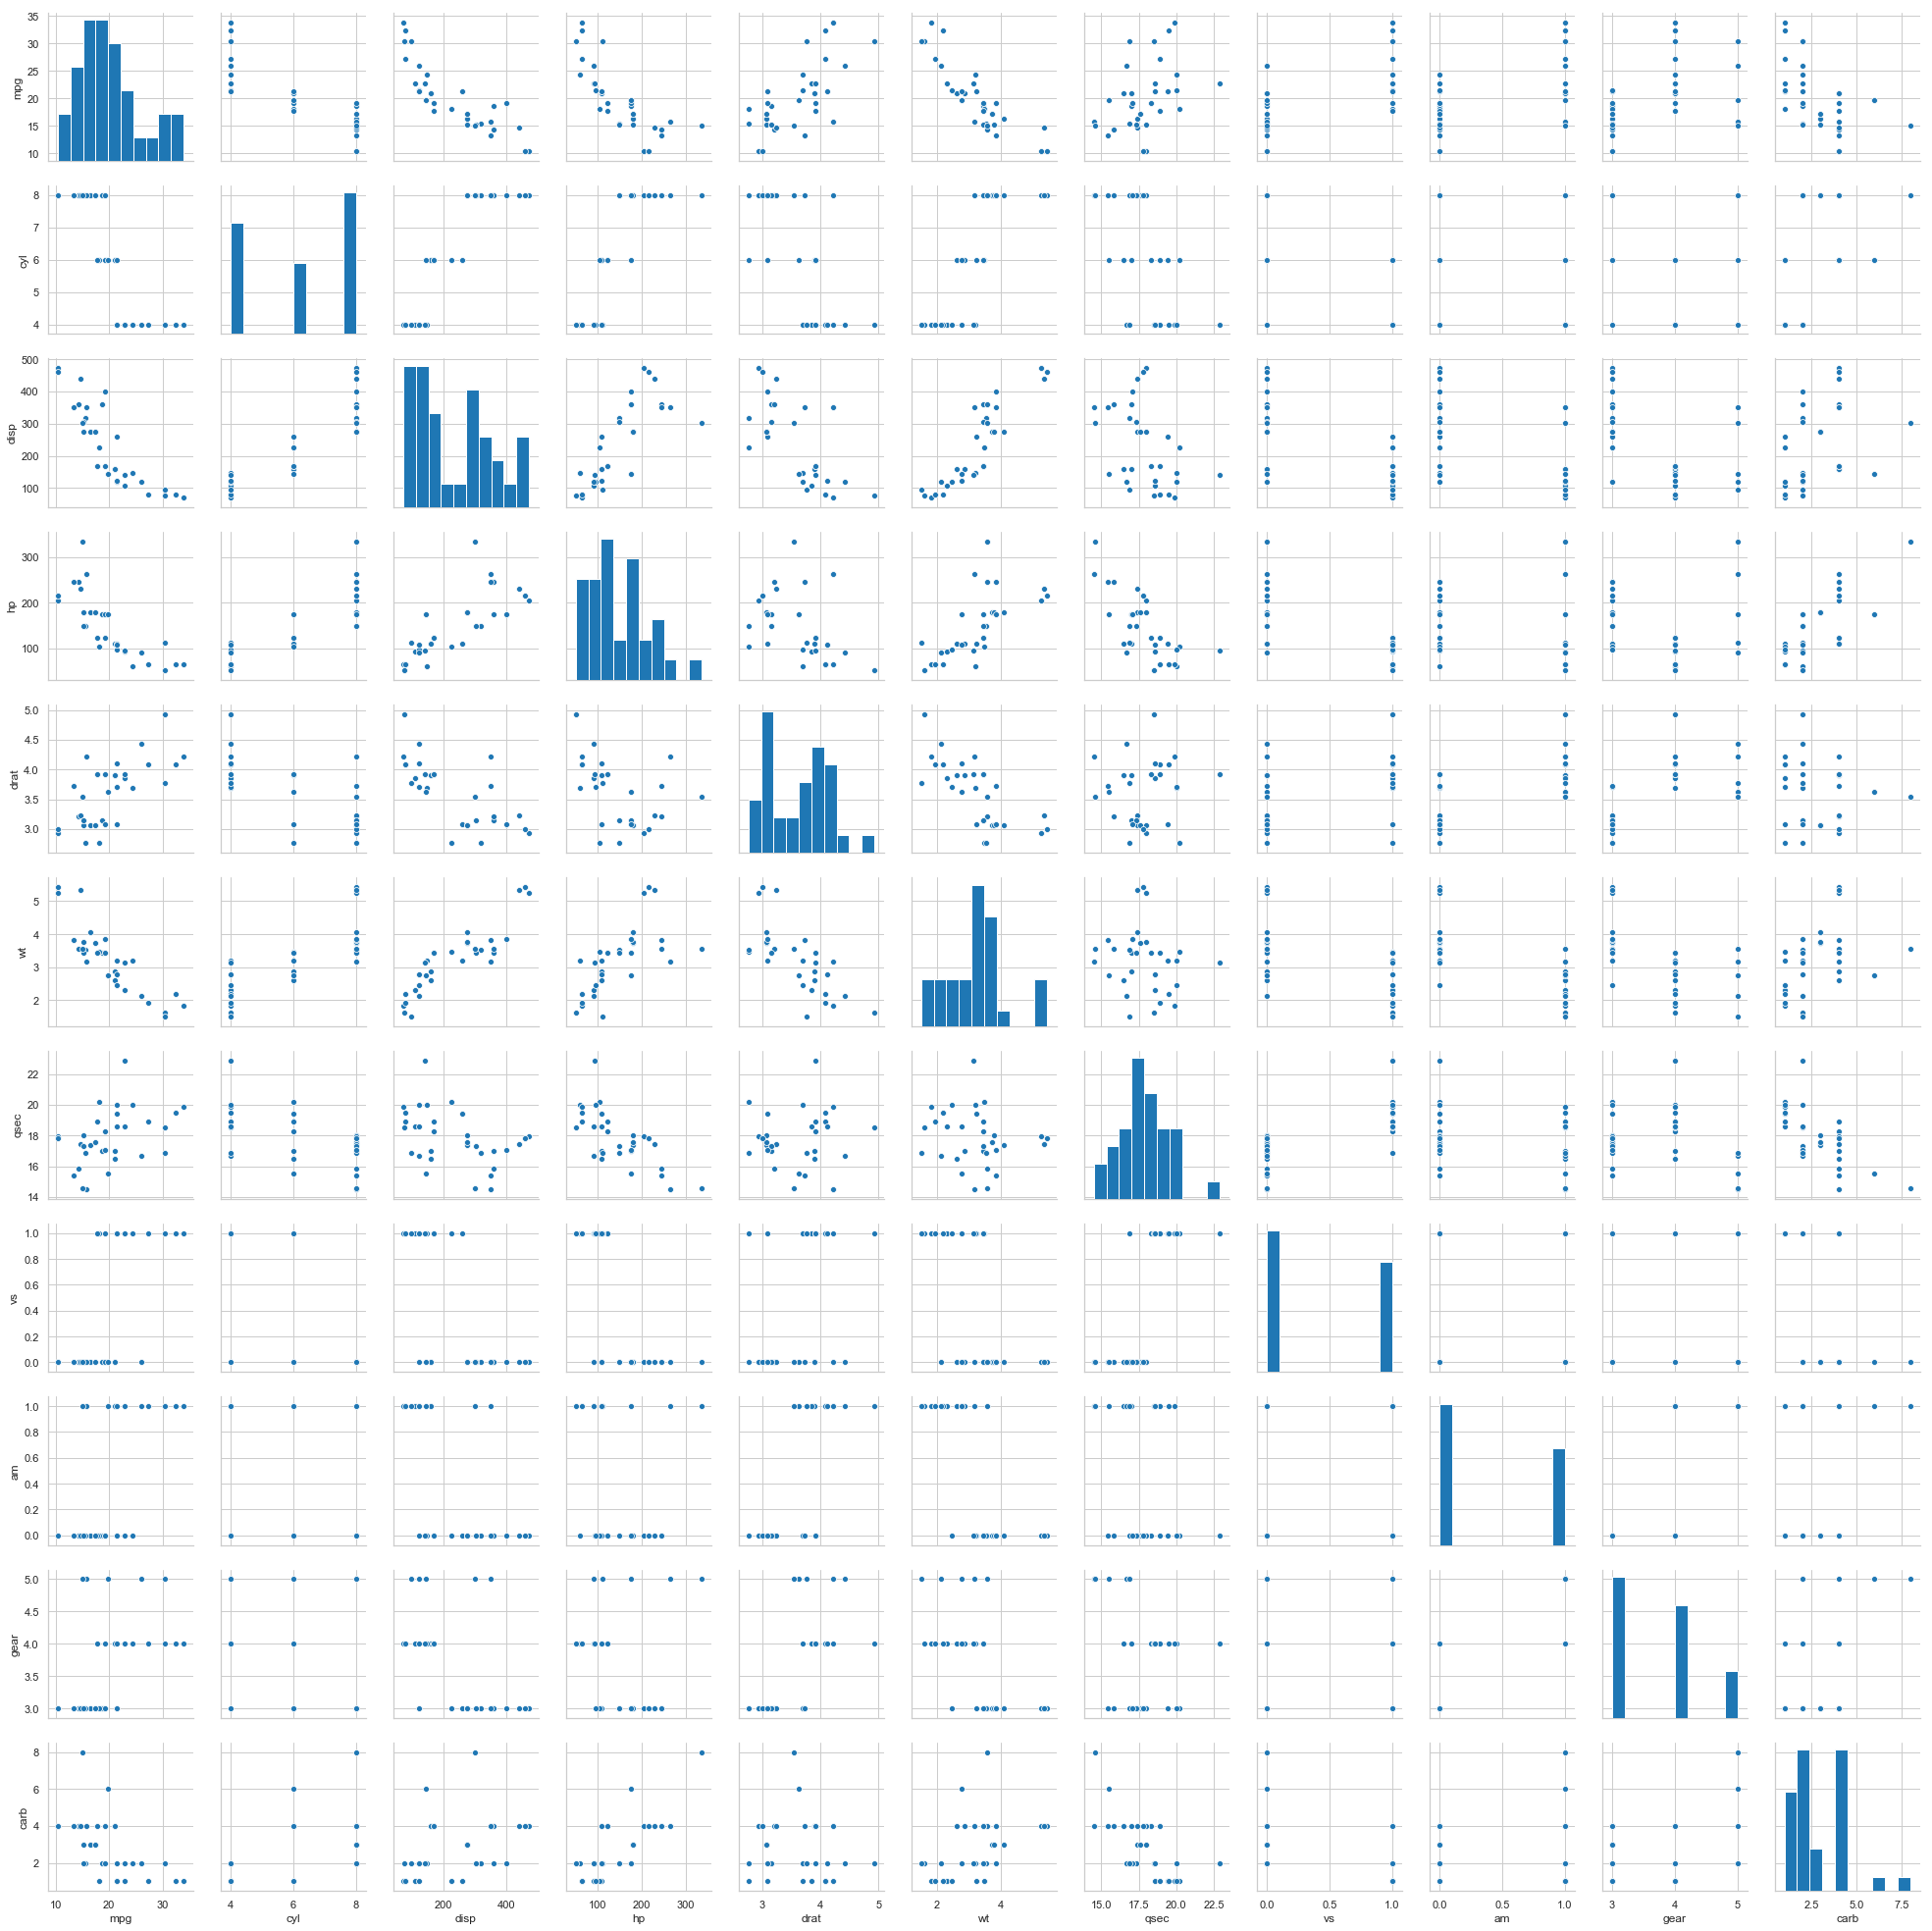

In [11]:
sns.pairplot(dfcars)

In [12]:
for c in dfcars.columns:
    print('------------------',c,'----------------')
    print(dfcars[c].unique())

------------------ name ----------------
['Mazda RX4' 'Mazda RX4 Wag' 'Datsun 710' 'Hornet 4 Drive'
 'Hornet Sportabout' 'Valiant' 'Duster 360' 'Merc 240D' 'Merc 230'
 'Merc 280' 'Merc 280C' 'Merc 450SE' 'Merc 450SL' 'Merc 450SLC'
 'Cadillac Fleetwood' 'Lincoln Continental' 'Chrysler Imperial' 'Fiat 128'
 'Honda Civic' 'Toyota Corolla' 'Toyota Corona' 'Dodge Challenger'
 'AMC Javelin' 'Camaro Z28' 'Pontiac Firebird' 'Fiat X1-9' 'Porsche 914-2'
 'Lotus Europa' 'Ford Pantera L' 'Ferrari Dino' 'Maserati Bora'
 'Volvo 142E']
------------------ mpg ----------------
[21.  22.8 21.4 18.7 18.1 14.3 24.4 19.2 17.8 16.4 17.3 15.2 10.4 14.7
 32.4 30.4 33.9 21.5 15.5 13.3 27.3 26.  15.8 19.7 15. ]
------------------ cyl ----------------
[6 4 8]
------------------ disp ----------------
[160.  108.  258.  360.  225.  146.7 140.8 167.6 275.8 472.  460.  440.
  78.7  75.7  71.1 120.1 318.  304.  350.  400.   79.  120.3  95.1 351.
 145.  301.  121. ]
------------------ hp ----------------
[110  93 175 

C:\Users\ashwi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


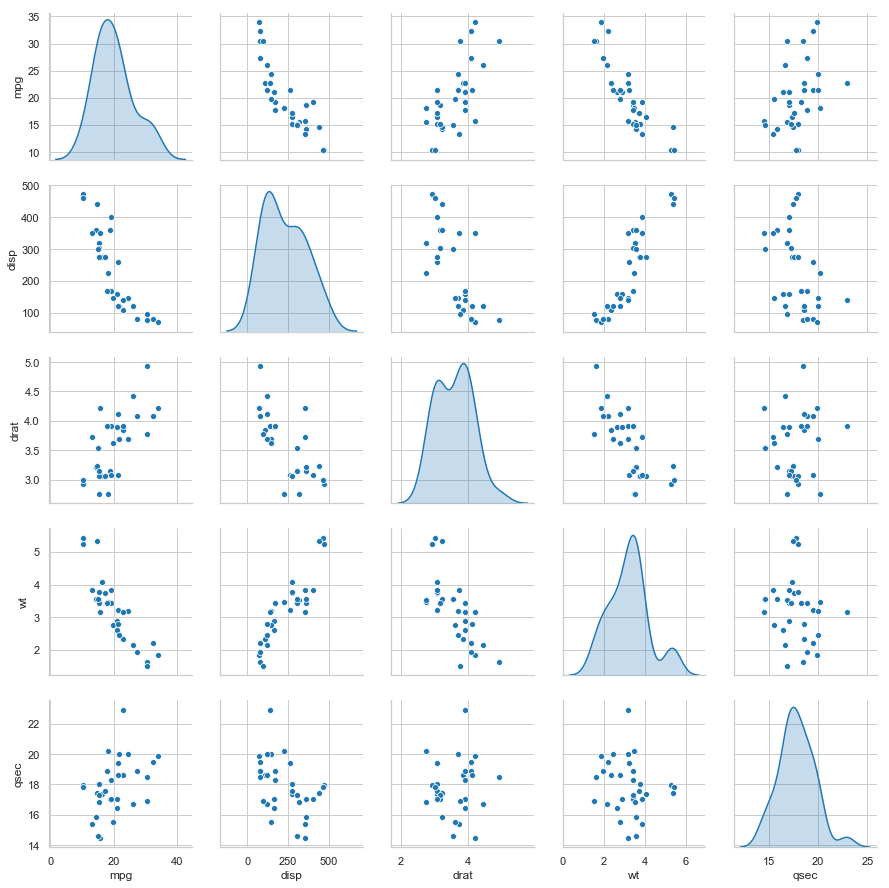

In [13]:
sns.pairplot(dfcars[['mpg','disp','drat','wt','qsec']],diag_kind="kde")

### MPG vs WT - simple Linear Regression

In [14]:
#define  predictor and response for training set
y_train = traindf.mpg
x_train = traindf[['wt']]

# define predictor and response for testing set
y_test = testdf.mpg
x_test = testdf[['wt']]

In [15]:
regr = linear_model.LinearRegression(fit_intercept=True)
regfit = regr.fit(x_train,y_train)
reg_predict = regr.predict(x_test)
print('The coeffiecients are : {},{}'.format(regfit.coef_[0],regfit.intercept_))


The coeffiecients are : -5.022919247853251,36.74881450942833


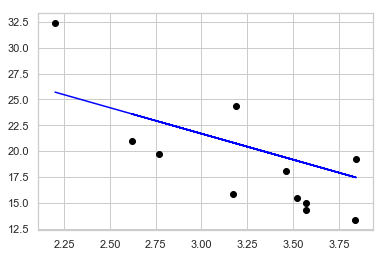

In [16]:
plt.scatter(x_test,y_test,color = 'black')
plt.plot(x_test,reg_predict,color = 'blue')

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
train_MSE = mean_squared_error(y_train,regr.predict(x_train))
test_MSE = mean_squared_error(y_test,regr.predict(x_test))

print("The Train set MSE is {} and the Test set MSE is {}".format(train_MSE,test_MSE))

The Train set MSE is 5.685041271452279 and the Test set MSE is 15.449756083173487


### MPG vs Wt,Hp - Mutiple Linear Regression

In [19]:
x_train2 = traindf[['wt', 'hp']]
x_test2 = testdf[['wt', 'hp']]

#create linear regression object with sklearn
regr2 = linear_model.LinearRegression()

#train the model 
regr2.fit(x_train2, y_train)

#make predictions using the testing set
y_pred2 = regr2.predict(x_test2)

#coefficients
print('Coefficients: \n', regr.coef_[0], regr.intercept_)

train_MSE2= np.mean((y_train - regr2.predict(x_train2))**2)
test_MSE2= np.mean((y_test - regr2.predict(x_test2))**2)
print("The training MSE is %2f, the testing MSE is %2f" %(train_MSE2, test_MSE2))

## print(mean_squared_error(y_train, regr2.predict(x_train2)))
## print(mean_squared_error(y_test, regr2.predict(x_test2)))

##or using statsmodels
#Y = y_train
#X = x_train
#X = sm.add_constant(X)
#model = sm.OLS(Y,X)
#results = model.fit()
#print('Parameters: ', results.params)
#print('R2: ', results.rsquared)

Coefficients: 
 -5.022919247853251 36.74881450942833
The training MSE is 5.567383, the testing MSE is 9.071639


### K - Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors = 5)

In [48]:
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

y_train = np.array(traindf.mpg)
X_train = np.array(traindf.wt)
X_train = X_train.reshape(X_train.shape[0], 1)

In [49]:
y_test = np.array(testdf.mpg)
X_test = np.array(testdf.wt)
X_test = X_test.reshape(X_test.shape[0], 1)

In [50]:
knnreg.fit(X_train, y_train)
r2 = knnreg.score(X_test, y_test)
r2

0.6992188728167332

In [53]:
print(knnreg.score(X_train, y_train))
knnreg

0.8718092469742431


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [63]:
regdict = {}

for k in [1,2,4,6,8,10,15] :
    knnreg = KNeighborsRegressor(n_neighbors = k)
    knnreg.fit(X_train, y_train)
    regdict[k] = knnreg

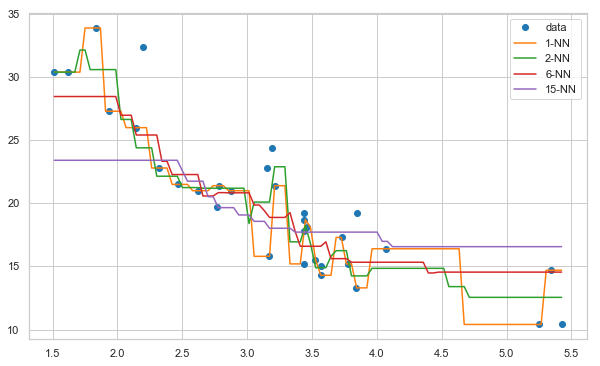

In [68]:
fig,ax = plt.subplots(1,1,figsize = (10,6))

ax.plot(dfcars.wt, dfcars.mpg, 'o', label="data")

xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)


for k in [1,2,6,15]:
    prediction = regdict[k].predict(xgrid.reshape(100,1))
    ax.plot(xgrid,prediction,label = '{}-NN'.format(k))
ax.legend(loc = 'best')

Text(0,0.5,'$R^{2}$')

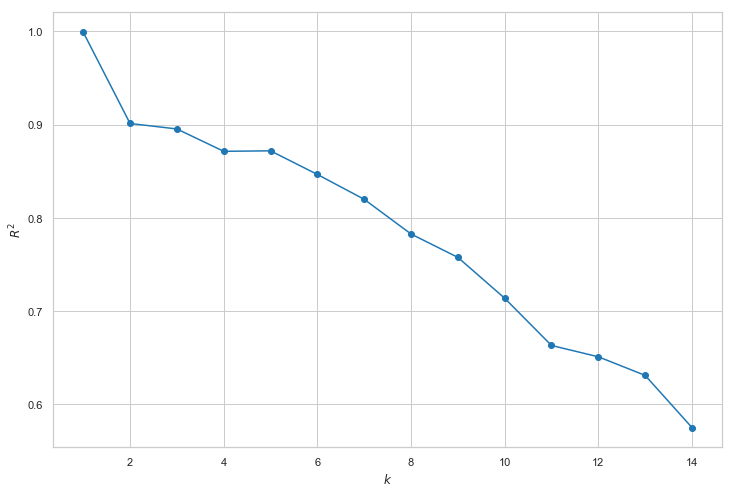

In [69]:
ks = range(1, 15) # Grid of k's
scores_train = [] # R2 scores
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k) # Create KNN model
    knnreg.fit(X_train, y_train) # Fit the model to training data
    score_train = knnreg.score(X_train, y_train) # Calculate R^2 score
    scores_train.append(score_train)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_train,'o-')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')

Text(0,0.5,'$R^{2}$')

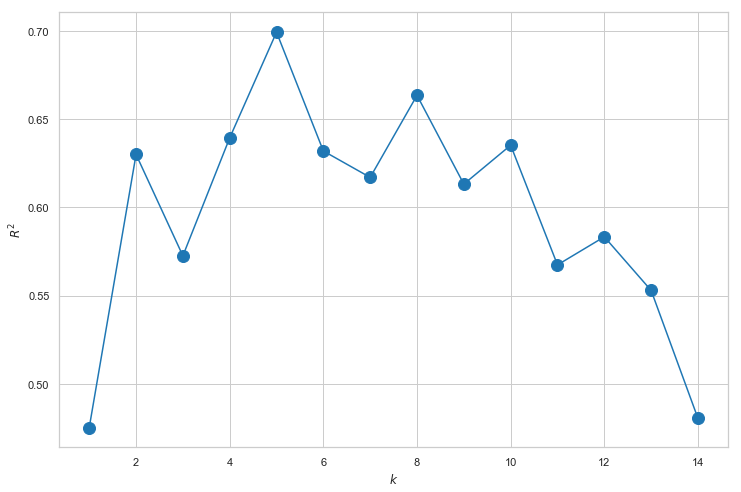

In [70]:
ks = range(1, 15) # Grid of k's
scores_test = [] # R2 scores
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k) # Create KNN model
    knnreg.fit(X_train, y_train) # Fit the model to training data
    score_test = knnreg.score(X_test, y_test) # Calculate R^2 score
    scores_test.append(score_test)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_test,'o-', ms=12)
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')